In [8]:
library("dplyr")

In [9]:
rawData = read.table("Table5.12.txt", header=TRUE, sep='\t')

In [11]:
head(rawData)

,STATE,y,x1,x2,x3,region
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ME,61,1704,388,399,1
2,NH,68,1885,372,598,1
3,VT,72,1745,397,370,1
4,MA,72,2394,358,868,1
5,RI,62,1966,357,899,1
6,CT,91,2817,362,690,1


In [12]:
theData <- rawData %>%
    mutate(r2 = 1 * (region == 2),
           r3 = 1 * (region == 3),
           r4 = 1 * (region == 4),
          year = y)

In [13]:
rawData$region <- as.factor(rawData$region)

In [14]:
rawData$year <- rawData$y

In [16]:
head(theData)

,STATE,y,x1,x2,x3,region,r2,r3,r4,year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ME,61,1704,388,399,1,0,0,0,61
2,NH,68,1885,372,598,1,0,0,0,68
3,VT,72,1745,397,370,1,0,0,0,72
4,MA,72,2394,358,868,1,0,0,0,72
5,RI,62,1966,357,899,1,0,0,0,62
6,CT,91,2817,362,690,1,0,0,0,91


In [17]:
head(rawData)

,STATE,y,x1,x2,x3,region,year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,ME,61,1704,388,399,1,61
2,NH,68,1885,372,598,1,68
3,VT,72,1745,397,370,1,72
4,MA,72,2394,358,868,1,72
5,RI,62,1966,357,899,1,62
6,CT,91,2817,362,690,1,91


In [53]:
lmfit <- lm(y ~ x1 + x2 + x3 + r2 + r3 + r4 + year + x1*year + x2*year + x3*year, data = theData)

Fit a model to the data. In your model, include X1, X2, X3, year, region indicator variables, and the interaction effects to allow the coefficients (“slopes”) for X1, X2, X3 to vary by year.

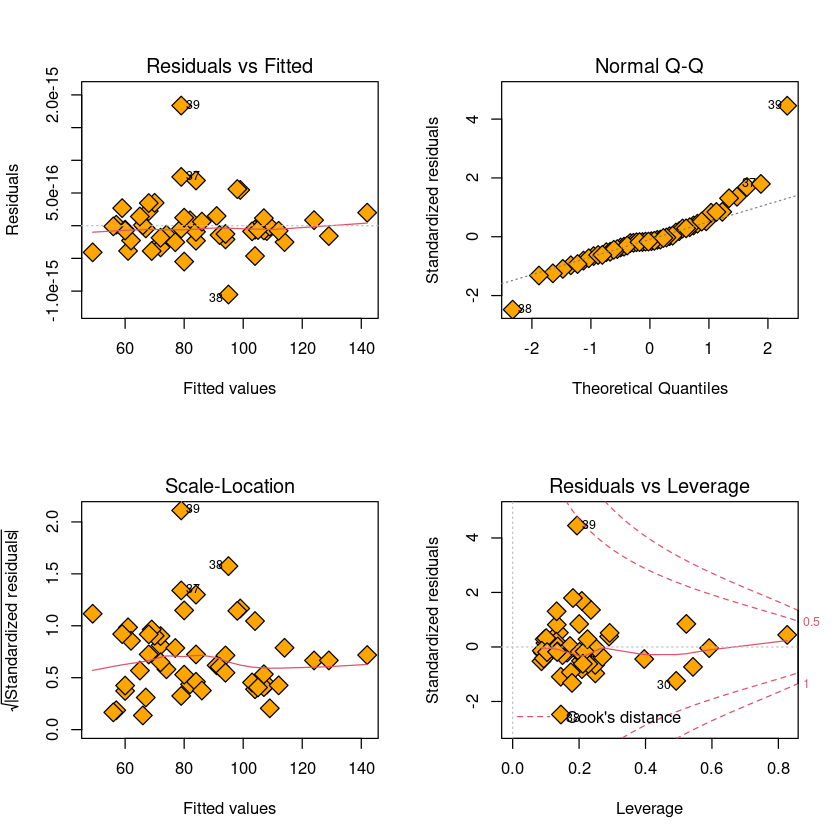

In [56]:
par(mfrow=c(2,2))
plot(lmfit, pch=23 ,bg='orange',cex=2)

In the plot of the standardized residuals vs $\hat{y}$ below, we see that the model violates the homoscedastic assumption on the errors. In fact, as the value of $\hat{y}$ increase, the variance of the residuals increases. This is reinforced in the Q-Q plot where we see that the residuals have greater dispersion than a normally distributed errors should have.

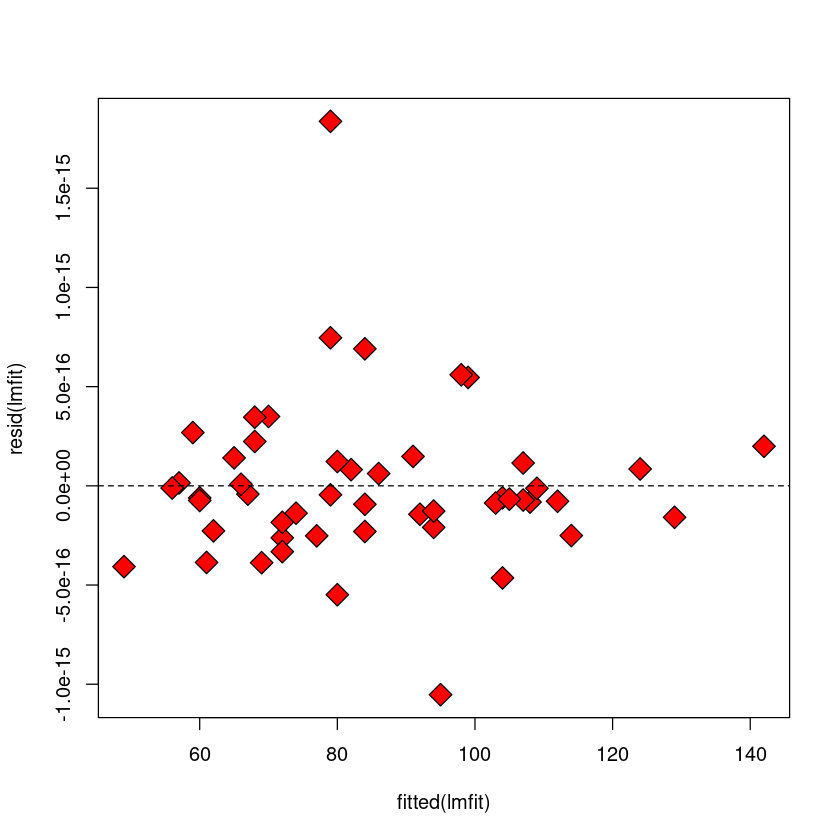

In [58]:
plot(fitted(lmfit), resid(lmfit), pch=23, bg='red', cex=2)
abline(h=0, lty=2)

The problems discovered in part above can sometimes be alleviated by changing the response from $y$ to $\log (y)$. Create a new response variable: $\log (y)$. Fit the same model in part above except using the new response variable, $\log (y)$.

In [54]:
theData <- theData %>%
    mutate(logy = log(y, 10))
lmfit.log <- lm(logy ~ x1 + x2 + x3 + r2 + r3 + r4 + year + x1*year + x2*year + x3*year, data = theData)

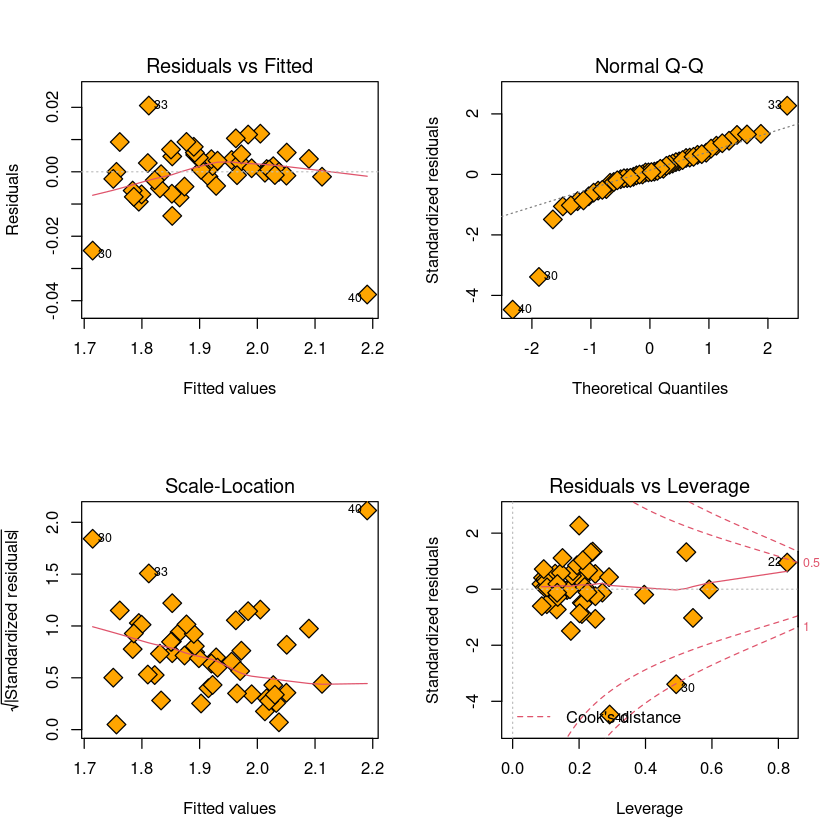

In [55]:
par(mfrow=c(2,2))
plot(lmfit.log, pch=23 ,bg='orange',cex=2)

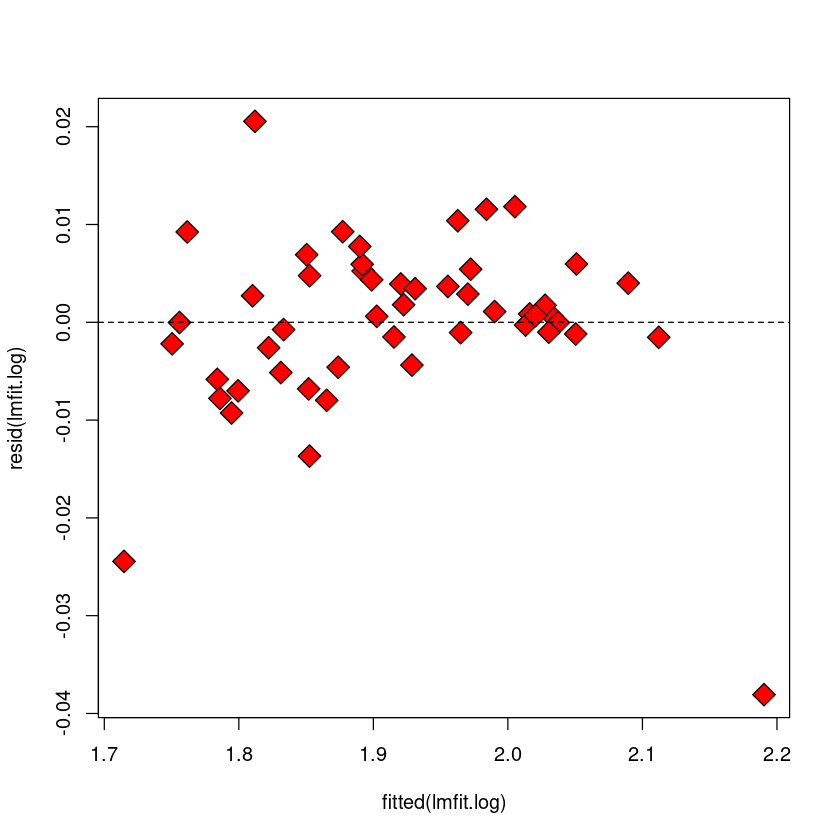

In [57]:
plot(fitted(lmfit.log), resid(lmfit.log), pch=23, bg='red', cex=2)
abline(h=0, lty=2)

From the figures below, we summarize our diagnostics.
- The linearity assumption seems valid. From the standardized residuals vs. $\hat{y}$, we see that there is no obvious pattern to the errors.
- From the same plot, we also no longer see any heteroscedasticity. However, we do see one residual that has a large, negative value. This is observation number 30 .
- The QQ plot suggests that a normal model for the errors is reasonable.
- However, we do see a few points of high leverage and a point of high influence. The observation with the largest leverage and largest influence are observation number 30.

Test the overall effects of $X_{1}, X_{2}, X_{3}$ on $Y$. Specify the hypothesis to be tested, the test used and your conclusions at the $5 \%$ significance level.
Denote the model by
$$
\begin{aligned}
\log _{10}(y)=& \beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\beta_{3} x_{3}+\beta_{4} r_{2}+\beta_{5} r_{3}+\beta_{6} r_{4}+\\
& \beta_{7} \text { year }+\beta_{8} x_{1} \text { year }+\beta_{9} x_{2} \text { year }+\beta_{10} x_{3} \text { year }+\epsilon
\end{aligned}
$$

- Hypothesis tests:
$$
H_{0}: \beta_{1}=\beta_{2}=\beta_{3}=\beta_{8}=\beta_{9}=\beta_{10}=0
$$
$$
H_{a}: \text{at least one of the coefficients is non-zero}
$$
- Test used: F-test.
$\begin{array}{lll} & \text { F Statistic } & \text { P-value } \\ \text { Observation 30 kept: } & 21.526 & <2.2 \mathrm{e}-16 \\ \text { Observation } 30 \text { removed: } 22.804 & <2.2 \mathrm{e}-16\end{array}$
- Conclusion: Reject the null hypothesis at $\alpha=0.05$. That is, the terms $X_{1}, X_{2}, X_{3}$ should not be removed from the model.

Test whether the effects of $X_{1}, X_{2}, X_{3}$ remain unchanged over time. Specify the hypothesis to be tested, the test used and your conclusions at the $5 \%$ significance level. One appropriate way to perform this test is to add indicator variables for the years. Then, we can consider the following model

$\begin{aligned} \log _{10}(y)=& \beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\beta_{3} x_{3}+\beta_{4} r_{2}+\beta_{5} r_{3}+\beta_{6} r_{4}+\\ & \gamma_{1} z_{1970}+\gamma_{2} z_{1975}+\delta_{1} x_{1} z_{1970}+\delta_{2} x_{1} z_{1975}+\\ & \delta_{3} x_{2} z_{1970}+\delta_{4} x_{2} z_{1975}+\delta_{5} x_{3} z_{1970}+\delta_{6} x_{3} z_{1975}+\epsilon \end{aligned}$

where $z_{1970}$ is 1 if the year is 1970 and 0 otherwise; and $z_{1975}$ is 1 if the year is 1975 and 0 otherwise.

There is some vagueness in the problem. We may test if the overall effects of $X_{1}, X_{2}, X_{3}$ remain unchanged over time or we may test if $X_{1}$ 's effect remains unchanged, $X_{2}$ 's effect remains unchanged or if $X_{3}$ 's effect remains unchanged over time. If each test is done individually, then the Bonferroni correction should be used. For the solution, we will test if the overall effects of $X_{1}, X_{2}, X_{3}$ remain unchanged over time.

- Hypothesis tests:
$$
H_{0}: \delta_{1}=\delta_{2}=\delta_{3}=\delta_{4}=\delta_{5}=\delta_{6}=0
$$
$$
H_{a}: \text{at least one of the coefficients is non-zero}
$$
- Test used: F-test.
$\begin{array}{lll} & \text { F Statistic } & \text { P-value } \\ \text { Observation 30 kept: } & 4.641 & 0.0002549 \\ \text { Observation 30 removed: } & 4.5213 & 0.0003321\end{array}$
- Conclusion: Reject the null hypothesis at $\alpha=0.05$. That is, the effects of $X_{1}, X_{2}$ and $X_{3}$ do change over time.

Based on findings in above section decide whether separate regressions by year interval need to be reported. Report coefficients for $X$ variables separately by year (i.e. fit a separate model for each year). We know from section above that there is statistical evidence to include the year coefficients in the model. Therefore, this suggests that we should separate the regressions by year.

- For 1960
$$
\begin{array}{rrrrrr}
& \text { term } & \text { estimate } & \text { std.error } & \text { statistic } & \text { p.value } \\
1 & \text { (Intercept) } & 1.565311 \mathrm{e}+00 & 1.071567 \mathrm{e}-01 & 14.6076792 & 2.812078 \mathrm{e}-18 \\
2 & \mathrm{x} 1 & 1.858449 \mathrm{e}-04 & 2.840047 \mathrm{e}-05 & 6.5437268 & 5.912989 \mathrm{e}-08 \\
3 & \mathrm{x} 2 & -6.868906 \mathrm{e}-05 & 1.768153 \mathrm{e}-04 & -0.3884792 & 6.995783 \mathrm{e}-01 \\
4 & \mathrm{x} 3 & -1.008785 \mathrm{e}-04 & 6.849121 \mathrm{e}-05 & -1.4728677 & 1.480694 \mathrm{e}-01 \\
5 & \mathrm{r} 2 & 8.998835 \mathrm{e}-02 & 2.496525 \mathrm{e}-02 & 3.6045441 & 8.071982 \mathrm{e}-04 \\
6 & \mathrm{r3} & 5.045615 \mathrm{e}-02 & 2.768262 \mathrm{e}-02 & 1.8226651 & 7.531234 \mathrm{e}-02 \\
7 & \mathrm{r} 4 & 1.656219 \mathrm{e}-01 & 2.514287 \mathrm{e}-02 & 6.5872322 & 5.111370 \mathrm{e}-08
\end{array}
$$

- For 1970
$$
\begin{array}{rrrrr}
& \text { term } & \text { estimate } & \text { std.error } & \text { statistic } & \text { p.value } \\
1 & \text { Intercept) } & 1.5733348166 & 1.597552 \mathrm{e}-01 & 9.8484095 & 1.369590 \mathrm{e}-12 \\
2 & \mathrm{x} 1 & 0.0001543246 & 2.311512 \mathrm{e}-05 & 6.6763496 & 3.793105 \mathrm{e}-08 \\
3 & \mathrm{x} 2 & 0.0009415367 & 4.078470 \mathrm{e}-04 & 2.3085539 & 2.584097 \mathrm{e}-02 \\
4 & \mathrm{x} 3 & -0.0002082683 & 7.592779 \mathrm{e}-05 & -2.7429778 & 8.841579 \mathrm{e}-03 \\
5 & r 2 & 0.0045121391 & 2.596437 \mathrm{e}-02 & 0.1737820 & 8.628524 \mathrm{e}-01 \\
6 & r 3 & -0.0187511395 & 2.871853 \mathrm{e}-02 & -0.6529284 & 5.172784 \mathrm{e}-01 \\
7 & r 4 & 0.0613218921 & 3.010727 \mathrm{e}-02 & 2.0367805 & 4.785873 \mathrm{e}-02
\end{array}
$$

- For 1975
$$
\begin{array}{rrrrr}
& \text { term } & \text { estimate } & \text { std.error } & \text { statistic } & \text { p.value } \\
1 & \text { Intercept) } & 1.501650 e+00 & 1.912740 \mathrm{e}-01 & 7.85077770 & 7.720540 \mathrm{e}-10 \\
2 & \mathrm{x} 1 & 9.276766 \mathrm{e}-05 & 1.788934 \mathrm{e}-05 & 5.18563809 & 5.499489 \mathrm{e}-06 \\
3 & \mathrm{x} 2 & 1.571523 \mathrm{e}-03 & 4.895898 \mathrm{e}-04 & 3.20987611 & 2.512489 \mathrm{e}-03 \\
4 & \mathrm{x} 3 & 1.708977 \mathrm{e}-06 & 7.290820 \mathrm{e}-05 & 0.02344012 & 9.814076 \mathrm{e}-01 \\
5 & r 2 & -1.977881 \mathrm{e}-02 & 2.489658 \mathrm{e}-02 & -0.79443892 & 4.313029 \mathrm{e}-01 \\
6 & r 3 & -1.871280 \mathrm{e}-02 & 2.541307 \mathrm{e}-02 & -0.73634572 & 4.655187 \mathrm{e}-01 \\
7 & r 4 & 3.032602 \mathrm{e}-02 & 2.698805 \mathrm{e}-02 & 1.12368320 & 2.673818 \mathrm{e}-01
\end{array}
$$

- new response variable model
$$
\begin{array}{rrrrr} 
& \text { term } & \text { estimate } & \text { std.error } & \text { statistic } & \text { p.value } \\
1 & \text { (Intercept) } & 1.560530 \mathrm{e}+00 & 9.986319 \mathrm{e}-02 & 15.62668225 & 2.078498 \mathrm{e}-32 \\
2 & \mathrm{x} 1 & 2.042802 \mathrm{e}-04 & 2.303646 \mathrm{e}-05 & 8.86769053 & 3.255906 \mathrm{e}-15 \\
3 & \mathrm{x} 2 & 7.361055 \mathrm{e}-05 & 1.744044 \mathrm{e}-04 & 0.42206817 & 6.736273 \mathrm{e}-01 \\
4 & \mathrm{x} 3 & -1.656538 \mathrm{e}-04 & 6.596496 \mathrm{e}-05 & -2.51123953 & 1.317552 \mathrm{e}-02 \\
5 & r 2 & 2.493975 \mathrm{e}-02 & 1.506686 \mathrm{e}-02 & 1.65527185 & 1.001255 \mathrm{e}-01 \\
6 & r 3 & 8.085911 \mathrm{e}-04 & 1.603168 \mathrm{e}-02 & 0.05043707 & 9.598465 \mathrm{e}-01 \\
7 & r 4 & 8.832339 \mathrm{e}-02 & 1.590520 \mathrm{e}-02 & 5.55311238 & 1.378712 \mathrm{e}-07 \\
8 & \text { year } & 7.248962 \mathrm{e}-03 & 1.230775 \mathrm{e}-02 & 0.58897541 & 5.568337 \mathrm{e}-01 \\
9 & \mathrm{x} 1: \text { year } & -7.166606 \mathrm{e}-06 & 1.446879 \mathrm{e}-06 & -4.95314682 & 2.086481 \mathrm{e}-06 \\
10 & \mathrm{x} 2: \text { year } & 6.556682 \mathrm{e}-05 & 2.719311 \mathrm{e}-05 & 2.41115563 & 1.720834 \mathrm{e}-02 \\
11 & \mathrm{x} 3: \text { year } & 6.016874 \mathrm{e}-06 & 5.870579 \mathrm{e}-06 & 1.02492002 & 3.071813 \mathrm{e}-01
\end{array}
$$

Compare the estimated coefficients $X_{1}, X_{2}, X_{3}$ for different models, Show that the coefficient estimates for in new response variable model which change the response from y to log(y) can be used to find the coefficients in above section.

Given the model used in new response variable model which change the response from y to log(y) with an ordinal year variable it would not be possible to recover the coefficients in above section. However, for the model
$$
\begin{aligned}
\log _{10}(y)=& \beta_{0}+\beta_{1} x_{1}+\beta_{2} x_{2}+\beta_{3} x_{3}+\beta_{4} r_{2}+\beta_{5} r_{3}+\beta_{6} r_{4}+\\
& \gamma_{1} z_{1970}+\gamma_{2} z_{1975}+\delta_{1} x_{1} z_{1970}+\delta_{2} x_{1} z_{1975}+\\
& \delta_{3} x_{2} z_{1970}+\delta_{4} x_{2} z_{1975}+\delta_{5} x_{3} z_{1970}+\delta_{6} x_{3} z_{1975}+\epsilon
\end{aligned}
$$
with nominal year variables (indicator variables) this would be possible.